In [127]:
!pip install statsmodels
!pip install sklearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [128]:
import math
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import seaborn as sns
sns.set()
import statsmodels.api as sm
import datetime
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import kpss
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings
import datetime
from statsmodels.tsa.ar_model import AR
import matplotlib.pyplot as plt

In [129]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
pip install --upgrade scalecast


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [131]:
import pickle

from scalecast.Forecaster import Forecaster

In [132]:
!pip install pyxlsb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [133]:
plt.rcParams['figure.figsize'] = [12, 9]
df = pd.read_csv('Datasetcsv.csv')
df.head()


,DCO,DEV,SENS,Volume_DEV
0,1/3/2022,AED,Achat,21654.50
1,1/4/2022,AED,Achat,83.89
2,2/18/2022,AED,Achat,5132.23
3,2/19/2022,AED,Achat,24167.50
4,1/5/2022,AED,Achat,5365.42


Setting DCO as an index for other columuns

Checking for missing data

In [134]:
missing_data = df.isnull()
missing_data.head(5)
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    

DCO
False    8064
Name: DCO, dtype: int64
DEV
False    8064
Name: DEV, dtype: int64
SENS
False    8064
Name: SENS, dtype: int64
Volume_DEV
False    8064
Name: Volume_DEV, dtype: int64


In [135]:
df.dtypes

DCO            object
DEV            object
SENS           object
Volume_DEV    float64
dtype: object

In [136]:
df[["SENS"]] = df[["SENS"]].astype(str)
df.dtypes

DCO            object
DEV            object
SENS           object
Volume_DEV    float64
dtype: object

In [137]:
df['DCO'] =  pd.to_datetime(df['DCO'], format='%m/%d/%Y')
df.set_index('DCO')

,DEV,SENS,Volume_DEV
DCO,,,
2022-01-03,AED,Achat,21654.50
2022-01-04,AED,Achat,83.89
2022-02-18,AED,Achat,5132.23
2022-02-19,AED,Achat,24167.50
2022-01-05,AED,Achat,5365.42
...,...,...,...
2022-09-23,USD,Vente,102277.06
2022-09-23,USD,Vente,6722.82
2022-09-26,USD,Vente,24426.50


In [138]:
df.head()

,DCO,DEV,SENS,Volume_DEV
0,2022-01-03,AED,Achat,21654.50
1,2022-01-04,AED,Achat,83.89
2,2022-02-18,AED,Achat,5132.23
3,2022-02-19,AED,Achat,24167.50
4,2022-01-05,AED,Achat,5365.42


In [139]:
df['DEV'].unique()

array(['AED', 'BHD', 'CAD', 'CHF', 'CNY', 'DKK', 'DZD', 'EUR', 'GBP',
       'JPY', 'KWD', 'MAD', 'NOK', 'QAR', 'SAR', 'SEK', 'USD', 'LYD'],
      dtype=object)

In [140]:
dictdev={}
for i in list(df['DEV'].unique()):
  dictdev[i]=df[df.DEV==i].set_index('DCO')
  dictdev[i]=dictdev[i][dictdev[i].SENS=='Achat']
  dictdev[i] = pd.DataFrame(dictdev[i].groupby(['DCO'])['Volume_DEV'].sum())


In [141]:
dictdev.keys()

dict_keys(['AED', 'BHD', 'CAD', 'CHF', 'CNY', 'DKK', 'DZD', 'EUR', 'GBP', 'JPY', 'KWD', 'MAD', 'NOK', 'QAR', 'SAR', 'SEK', 'USD', 'LYD'])

**Multplicative Decomposition**

In [142]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from statsmodels.tsa.seasonal import seasonal_decompose
def tsa(df):
  return seasonal_decompose(df['Volume_DEV'], model='multiplicable', period=12)


In [143]:
dictionarytsa= {}
for i in tqdm(dictdev.keys()):
  try:
    dictionarytsa[i] = tsa(dictdev[i])
  except:
    continue

100%|██████████| 18/18 [00:00<00:00, 252.95it/s]


In [144]:
dictdev['EUR'].tail()

,Volume_DEV
DCO,
2022-09-20,1740279.18
2022-09-21,1419551.13
2022-09-22,1585953.15
2022-09-23,1575637.97
2022-09-26,1808074.66


DEV:EUR time series decomposition using multiplicative method

Seasonal graph

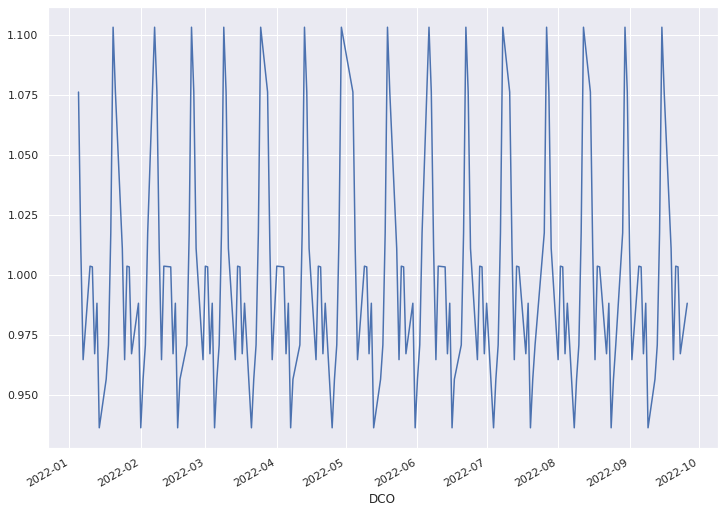

In [145]:
seasM=dictionarytsa['EUR'].seasonal
seasM.plot()

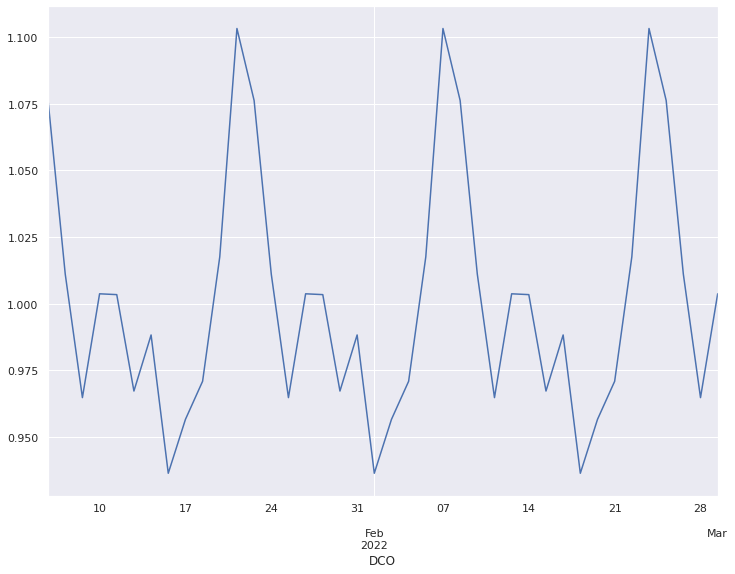

In [146]:
seasM=dictionarytsa['EUR'].seasonal
seasM.to_frame()
seasM.reset_index()
onemonth=seasM.iloc[:40]
onemonth.plot()



In [147]:
from pandas.tseries.holiday import *
sdt = datetime(2022, 1, 10)
edt = datetime(2022, 2 ,26)
print("Holidays between 2021-01-01 and 2030-12-31 using the US federal holiday calendar.")
cal = USFederalHolidayCalendar()
for dt in cal.holidays(start=sdt, end=edt): 
    print (dt)

Holidays between 2021-01-01 and 2030-12-31 using the US federal holiday calendar.
2022-01-17 00:00:00
2022-02-21 00:00:00


In [148]:
pip install workalendar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [149]:
import holidays
from workalendar.europe import France

In [150]:
fr_holidays = holidays.FR()
fr_holidays

holidays.country_holidays('FR', subdiv='Métropole')

In [151]:
for key, val in sorted(fr_holidays.items()):
    print(key, val)

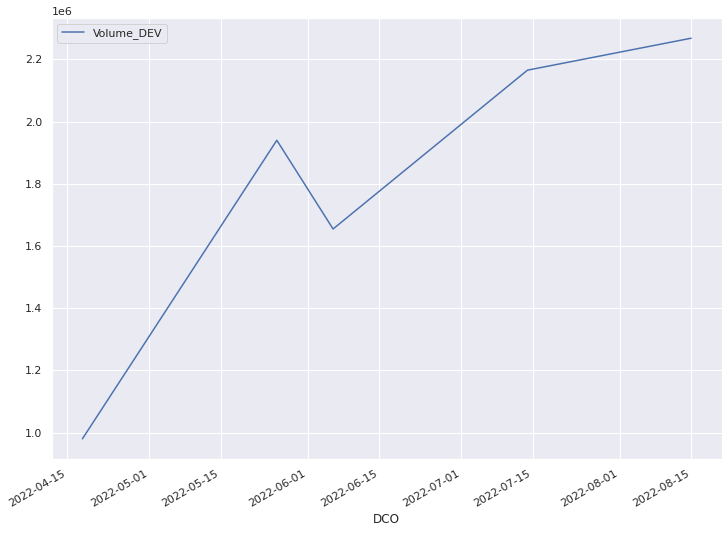

In [152]:
df3=dictdev['EUR'][dictdev['EUR'].index.map(lambda d: d in fr_holidays)]
df3.plot()

Trend chart

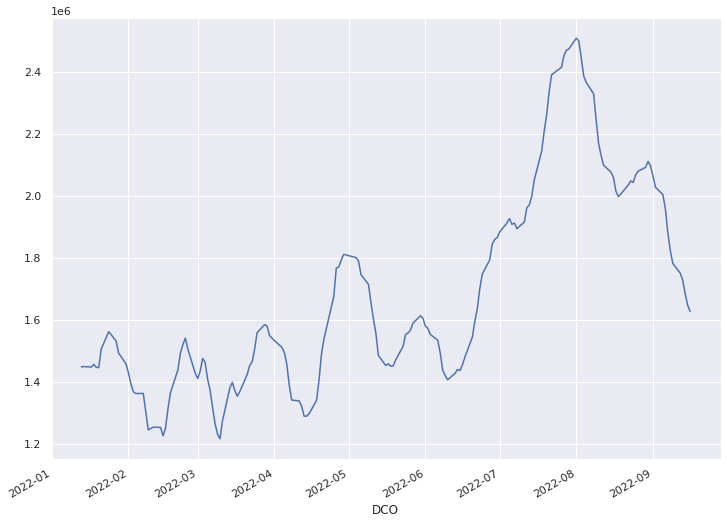

In [153]:
dictionarytsa['EUR'].trend.plot()

The Hodrick-Prescott (HP) filter refers to a data-smoothing technique. The HP filter is commonly applied during analysis to remove short-term fluctuations associated with the business cycle. Removal of these short-term fluctuations reveals long-term trends|**texte en gras** 

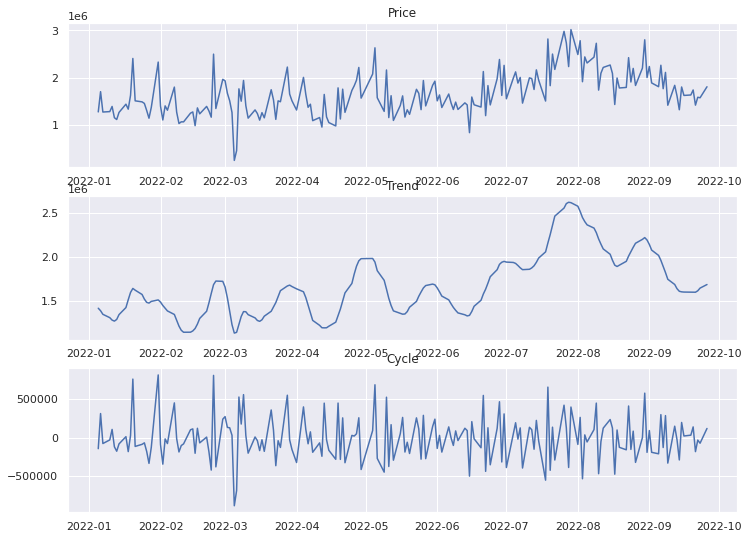

In [154]:
series=dictdev["EUR"]['Volume_DEV']
cycle, trend = sm.tsa.filters.hpfilter(series,12)
fig, ax = plt.subplots(3,1)
ax[0].plot(series)
ax[0].set_title('Price')
ax[1].plot(trend)
ax[1].set_title('Trend')
ax[2].plot(cycle)
ax[2].set_title('Cycle')
plt.show()

STL decomposition

In [155]:
df.index

RangeIndex(start=0, stop=8064, step=1)

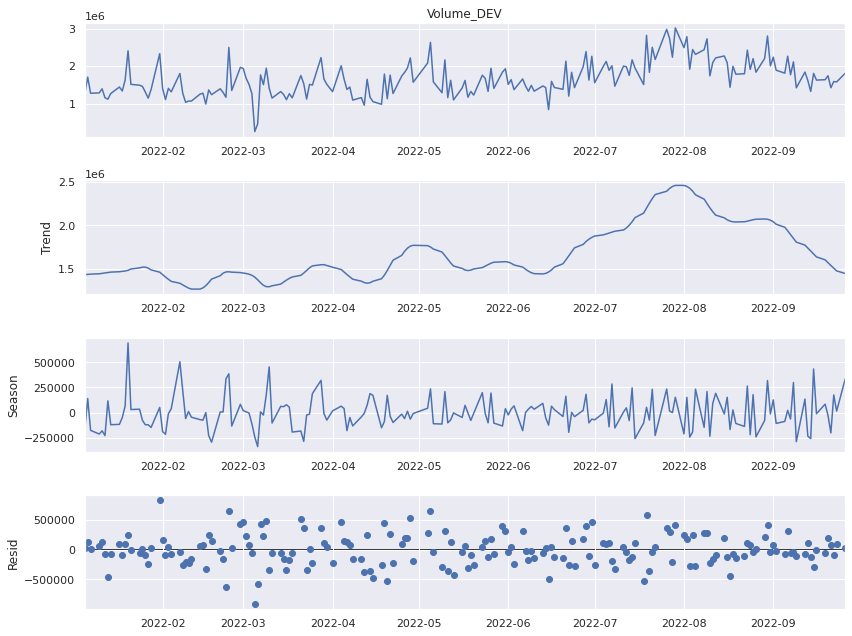

In [156]:
result = sm.tsa.STL(series, period = 12).fit()
chart = result.plot()
plt.show() 

In [157]:
import statsmodels.api as sm

#perform KPSS test
sm.tsa.stattools.kpss(series, regression='ct')

look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(



(0.09128263789053803,
 0.1,
 15,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

In [158]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **persistence model:this is the simplest kind of model which works by assigning the last observed value as the prediction for the following value, i.e. it just “persists” the last price forward. As you can see its not exactly a very sophisticated model, however its a start and it provides a baseline of performance for the problem that we can use for comparison with an auto regression model. We will score our model performance using the Root Mean Squared Error (RMSE).**

Test RMSE: 487740.40846


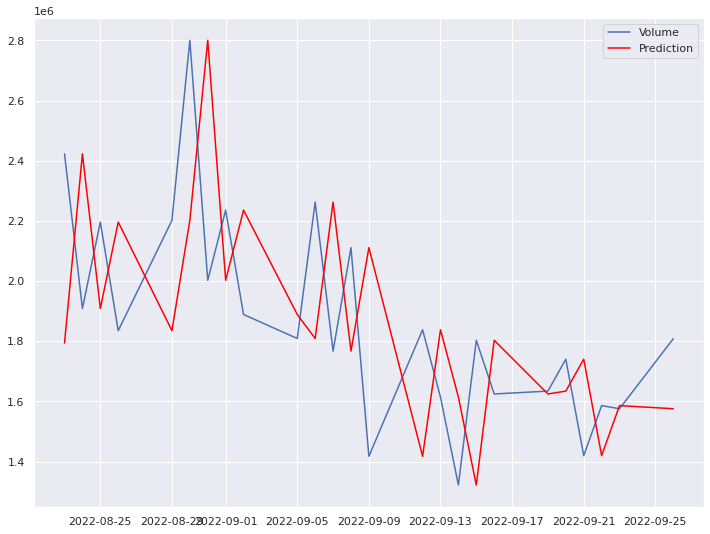

In [159]:
predictions = series.shift(1).dropna()
test_score = np.sqrt(mean_squared_error(series[int(len(series) * 0.7)+1:], predictions.iloc[int(len(series) * 0.7):]))
print('Test RMSE: %.5f' % test_score)
plt.plot(series.iloc[-25:], label='Volume')
plt.plot(predictions[-25:], color='red', label='Prediction')
plt.legend()
plt.show()

In [160]:
pip install matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


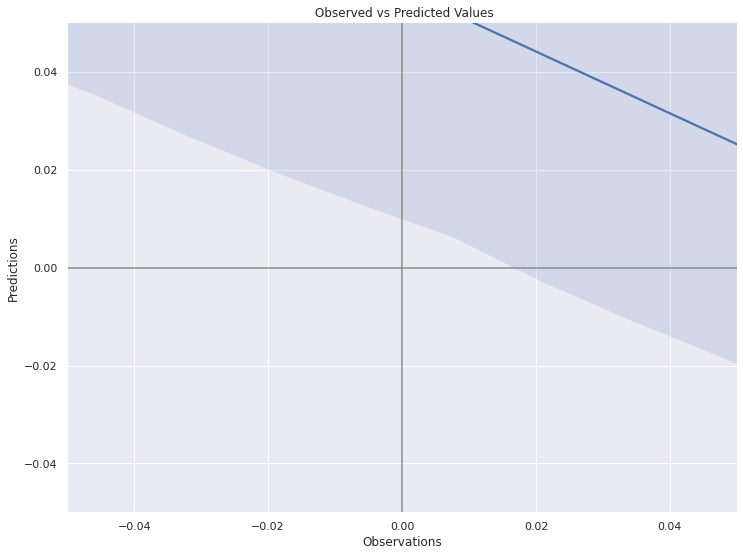

The MAE is 0.3715


In [161]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
fig, ax = plt.subplots()
x = series.iloc[-int(len(series) * 0.5):].pct_change() 
y = predictions.iloc[-int(len(series) * 0.5):].pct_change()
ax = sns.regplot( x,y )

plt.xlabel('Observations')
plt.ylabel('Predictions')
plt.title(' Observed vs Predicted Values')
ax.grid(True, which='both')
ax.axhline(y=0, color='#888888')
ax.axvline(x=0, color='#888888')
sns.despine(ax=ax, offset=0)
plt.xlim(-0.05, 0.05)
plt.ylim(-0.05, 0.05)
plt.show()
mae = round(abs(series.iloc[-int(len(series) * 0.3):].pct_change() - predictions.iloc[-int(len(series) * 0.3):].pct_change()).mean(),4)
print(f'The MAE is {mae}')

In [162]:
price_pred = pd.concat([series.iloc[-int(len(series) * 0.3):].pct_change(), predictions.iloc[-int(len(series) * 0.3):].pct_change()], axis=1)
price_pred.dropna(inplace=True)
price_pred.columns = ['Price', 'preds']
price_pred['hit'] = np.where(np.sign(price_pred['Price']) == np.sign(price_pred['preds']), 1, 0)
print(f"Hit rate: {round((price_pred['hit'].sum() / price_pred['hit'].count()) * 100,2)}%")

Hit rate: 21.82%


In [163]:
df_corr = pd.read_csv('combined_buy.csv')
df_corr.head()

,DCO,AED_B,CAD_B,CHF_B,DKK_B,EUR_B,GBP_B,KWD_B,QAR_B,SAR_B,SEK_B,USD_B
0,1/2/2022,6.516,397.942,593.603,NaN,566.732,513.003,35.000,18.421,60.094,11.842,535.790
1,1/3/2022,7.793,357.552,528.191,419.000,585.261,184.503,5.110,41.376,439.434,12.149,624.968
2,1/4/2022,28.953,158.222,563.336,896.585,173.286,141.468,159.000,502.608,350.445,219.259,97.526
3,1/6/2022,1225.000,356.863,823.856,55.237,609.404,147.045,218.000,577.857,155.172,674.593,488.072
4,1/7/2022,31.591,161.358,736.302,1.680,1554.635,148.522,698.453,619.715,360.641,71.914,269.962


We can see here the correlation between each matrix in the cell **below**

# Correlation of currency between each other while buying 






In [164]:
corr = df_corr.corr()
corr.style.background_gradient(cmap='coolwarm')

,AED_B,CAD_B,CHF_B,DKK_B,EUR_B,GBP_B,KWD_B,QAR_B,SAR_B,SEK_B,USD_B
AED_B,1.000000,0.176210,-0.080271,0.031145,0.077823,-0.008883,0.116797,0.022698,-0.019477,-0.011953,-0.067073
CAD_B,0.176210,1.000000,-0.001113,0.170221,-0.144374,0.061696,0.034454,0.002970,0.121789,-0.011077,-0.074240
CHF_B,-0.080271,-0.001113,1.000000,-0.089308,-0.089485,0.008338,-0.076333,0.062304,0.036422,0.003446,0.115272
DKK_B,0.031145,0.170221,-0.089308,1.000000,-0.087474,0.075229,0.058534,0.046697,0.071884,-0.020565,-0.189603
EUR_B,0.077823,-0.144374,-0.089485,-0.087474,1.000000,0.046735,0.070805,0.120478,-0.058608,-0.075872,-0.079935
GBP_B,-0.008883,0.061696,0.008338,0.075229,0.046735,1.000000,-0.048002,0.007462,-0.062947,0.067843,-0.038468
KWD_B,0.116797,0.034454,-0.076333,0.058534,0.070805,-0.048002,1.000000,-0.009216,0.005392,-0.041639,-0.114772
QAR_B,0.022698,0.002970,0.062304,0.046697,0.120478,0.007462,-0.009216,1.000000,0.164443,-0.136933,-0.026373
SAR_B,-0.019477,0.121789,0.036422,0.071884,-0.058608,-0.062947,0.005392,0.164443,1.000000,0.084627,-0.011611
SEK_B,-0.011953,-0.011077,0.003446,-0.020565,-0.075872,0.067843,-0.041639,-0.136933,0.084627,1.000000,0.000670


# Correlation of currency between each other while selling


In [165]:
df_corr = pd.read_csv('combined_sell.csv')
df_corr.head()
corr = df_corr.corr()
corr.style.background_gradient(cmap='coolwarm')

,CAD_S,CHF_S,EUR_S,GBP_S,USD_S
CAD_S,1.000000,-0.002319,-0.122543,-0.025766,-0.076084
CHF_S,-0.002319,1.000000,-0.071922,0.031436,0.018838
EUR_S,-0.122543,-0.071922,1.000000,0.030706,0.203779
GBP_S,-0.025766,0.031436,0.030706,1.000000,0.034371
USD_S,-0.076084,0.018838,0.203779,0.034371,1.000000


In [166]:
new=dictdev['EUR']
new.tail()

,Volume_DEV
DCO,
2022-09-20,1740279.18
2022-09-21,1419551.13
2022-09-22,1585953.15
2022-09-23,1575637.97
2022-09-26,1808074.66


In [167]:
f = Forecaster(y=new['Volume_DEV'], current_dates=df['DCO'])

In [168]:
f

Forecaster(
    DateStartActuals=2022-06-29T00:00:00.000000000
    DateEndActuals=2022-09-26T00:00:00.000000000
    Freq=None
    N_actuals=187
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
    GridsFile=Grids
)

In [169]:
f.set_test_length(12)       # 1. 12 observations to test the results
f.generate_future_dates(12) # 2. 12 future points to forecast
f.set_estimator('lstm') 

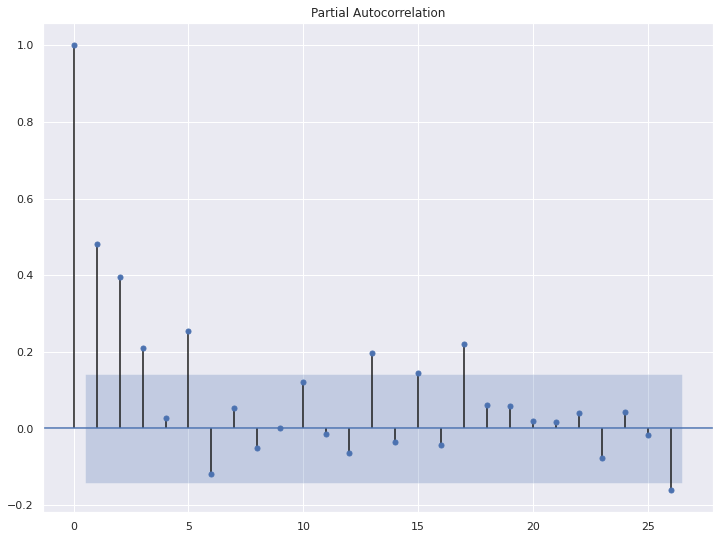

In [170]:
f.plot_pacf(lags=26)
plt.show()

6/6 [==============================] - 0s 3ms/step


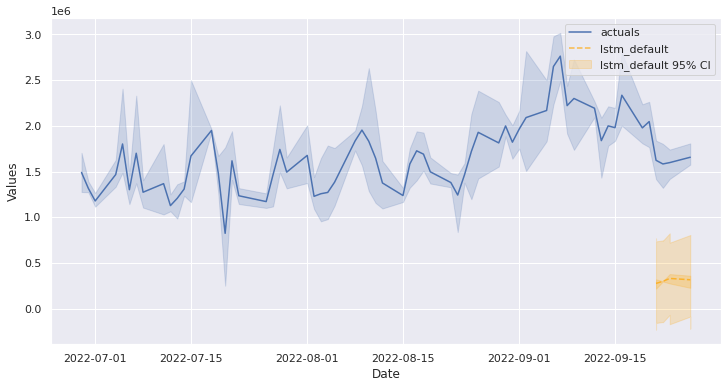

In [171]:
f.manual_forecast(call_me='lstm_default')
f.plot_test_set(ci=True)

5/5 [==============================] - 0s 7ms/step


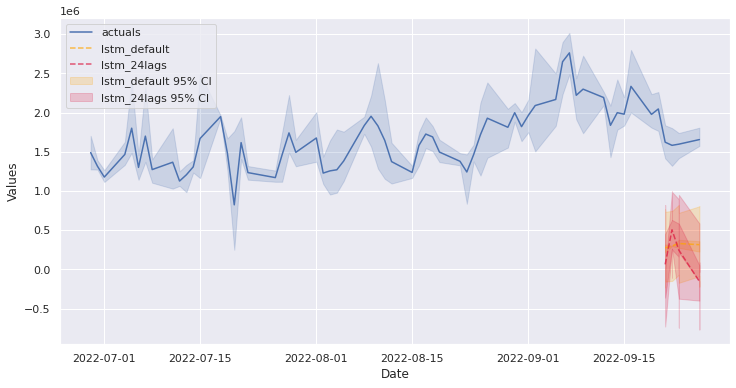

In [172]:
f.manual_forecast(call_me='lstm_24lags',lags=24)
f.plot_test_set(ci=True)


Epoch 1/5
4/4 [==============================] - 3s 182ms/step - loss: 0.5121 - val_loss: 0.3825
Epoch 2/5
4/4 [==============================] - 0s 16ms/step - loss: 0.4973 - val_loss: 0.3699
Epoch 3/5
4/4 [==============================] - 0s 18ms/step - loss: 0.4822 - val_loss: 0.3571
Epoch 4/5
4/4 [==============================] - 0s 17ms/step - loss: 0.4667 - val_loss: 0.3442
Epoch 5/5
1/1 [==============================] - 0s 465ms/step
Epoch 1/5
4/4 [==============================] - 2s 171ms/step - loss: 0.5117 - val_loss: 0.3804
Epoch 2/5
4/4 [==============================] - 0s 15ms/step - loss: 0.4953 - val_loss: 0.3674
Epoch 3/5
4/4 [==============================] - 0s 16ms/step - loss: 0.4781 - val_loss: 0.3541
Epoch 4/5
4/4 [==============================] - 0s 16ms/step - loss: 0.4603 - val_loss: 0.3403
Epoch 5/5
5/5 [==============================] - 0s 4ms/step


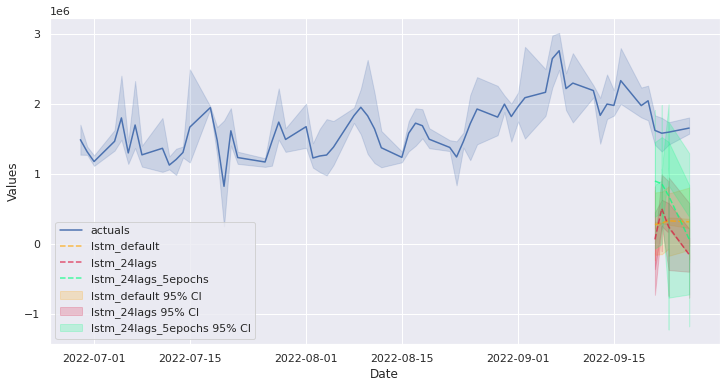

In [173]:
f.manual_forecast(call_me='lstm_24lags_5epochs',
                  lags=24,
                  epochs=5,
                  validation_split=.2,
                  shuffle=True)
f.plot_test_set(ci=True)

Epoch 1/25
4/4 [==============================] - 7s 449ms/step - loss: 0.5527 - val_loss: 0.3984
Epoch 2/25
4/4 [==============================] - 0s 35ms/step - loss: 0.5295 - val_loss: 0.3757
Epoch 3/25
4/4 [==============================] - 0s 38ms/step - loss: 0.4990 - val_loss: 0.3440
Epoch 4/25
4/4 [==============================] - 0s 35ms/step - loss: 0.4539 - val_loss: 0.2967
Epoch 5/25
4/4 [==============================] - 0s 41ms/step - loss: 0.3870 - val_loss: 0.2499
Epoch 6/25
4/4 [==============================] - 0s 40ms/step - loss: 0.3183 - val_loss: 0.2497
Epoch 7/25
4/4 [==============================] - 0s 36ms/step - loss: 0.2894 - val_loss: 0.2602
Epoch 8/25
4/4 [==============================] - 0s 35ms/step - loss: 0.2676 - val_loss: 0.2389
Epoch 9/25
4/4 [==============================] - 0s 35ms/step - loss: 0.2372 - val_loss: 0.2059
Epoch 10/25
4/4 [==============================] - 0s 36ms/step - loss: 0.2131 - val_loss: 0.1818
Epoch 11/25
4/4 [===========

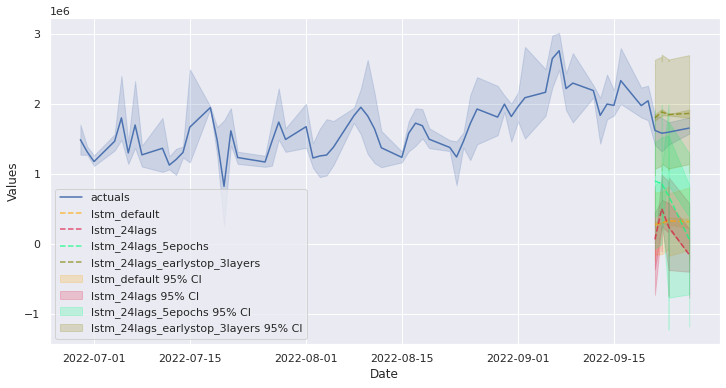

In [174]:
from tensorflow.keras.callbacks import EarlyStopping
f.manual_forecast(call_me='lstm_24lags_earlystop_3layers',
                  lags=24,
                  epochs=25,
                  validation_split=.2,
                  shuffle=True,
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  lstm_layer_sizes=(16,16,16),
                  dropout=(0,0,0))
f.plot_test_set(ci=True)

Epoch 1/15
4/4 [==============================] - 9s 635ms/step - loss: 0.5386 - val_loss: 0.3443
Epoch 2/15
4/4 [==============================] - 0s 71ms/step - loss: 0.3846 - val_loss: 0.2440
Epoch 3/15
4/4 [==============================] - 0s 70ms/step - loss: 0.2316 - val_loss: 0.1610
Epoch 4/15
4/4 [==============================] - 0s 68ms/step - loss: 0.1597 - val_loss: 0.1330
Epoch 5/15
4/4 [==============================] - 0s 80ms/step - loss: 0.1417 - val_loss: 0.1840
Epoch 6/15
4/4 [==============================] - 0s 74ms/step - loss: 0.1459 - val_loss: 0.1464
Epoch 7/15
4/4 [==============================] - 0s 71ms/step - loss: 0.1365 - val_loss: 0.1274
Epoch 8/15
4/4 [==============================] - 0s 75ms/step - loss: 0.1327 - val_loss: 0.1591
Epoch 9/15
4/4 [==============================] - 0s 68ms/step - loss: 0.1289 - val_loss: 0.1436
Epoch 10/15
4/4 [==============================] - 0s 69ms/step - loss: 0.1282 - val_loss: 0.1386
Epoch 11/15
4/4 [===========

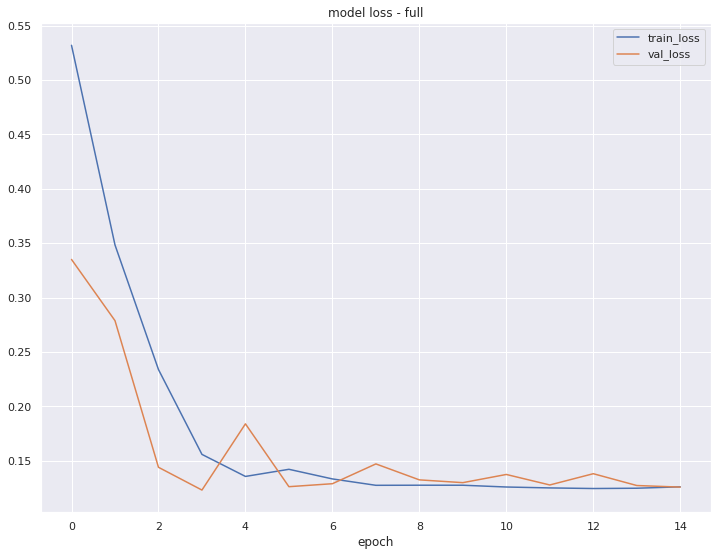

5/5 [==============================] - 0s 18ms/step


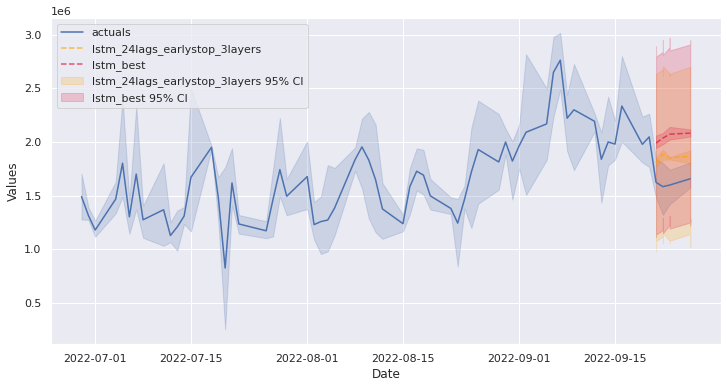

In [175]:
f.manual_forecast(call_me='lstm_best',
                  lags=24,
                  batch_size=32,
                  epochs=15,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(72,)*4,
                  dropout=(0,)*4,
                  plot_loss=True)
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)


In [176]:
f.set_estimator('mlr') # 1. choose the mlr estimator
f.add_ar_terms(24) # 2. add regressors (24 lagged terms)
f.add_seasonal_regressors('month','quarter',dummy=True) # 2.
f.add_seasonal_regressors('year') # 2.
f.add_time_trend() # 2.
f.diff() # 3. difference non-stationary data

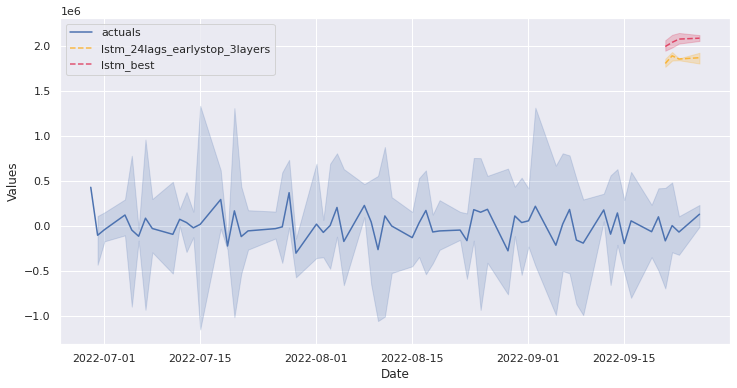

In [177]:
f.manual_forecast()
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2')


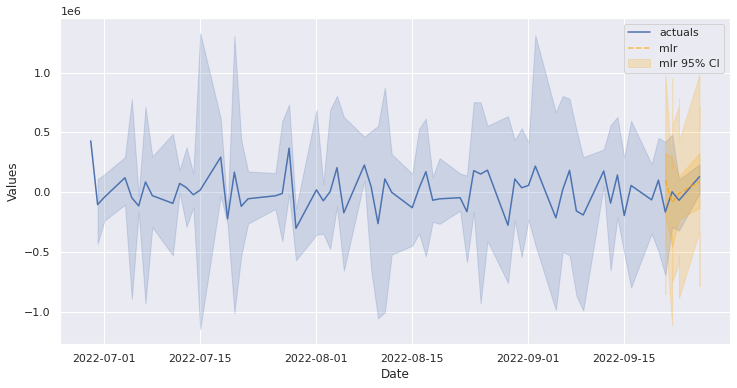

In [178]:
f.plot_test_set(models='mlr',ci=True)


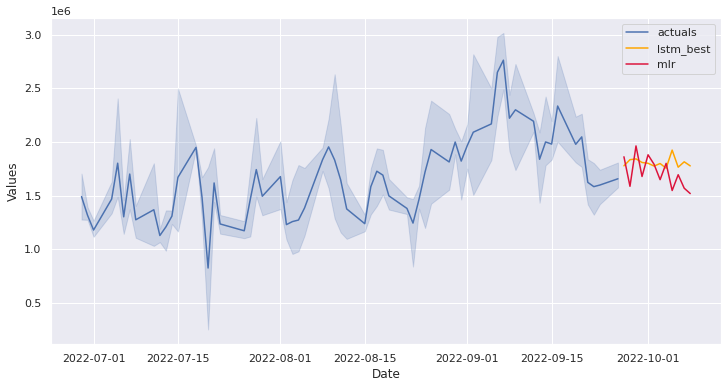

In [179]:
f.plot(models=['mlr','lstm_best'],
       order_by='LevelTestSetMAPE',
       level=True)


In [180]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

,ModelNickname,LevelTestSetMAPE,LevelTestSetRMSE,LevelTestSetR2,best_model
0,lstm_24lags_earlystop_3layers,0.166379,2.998720e+05,-2.545850,True
1,lstm_best,0.278494,4.600621e+05,-7.346060,False
2,mlr,0.375708,6.150865e+05,-13.918358,False
3,lstm_24lags_5epochs,0.602198,1.273189e+06,-62.919672,False
4,lstm_default,0.809452,1.319346e+06,-67.638213,False
5,lstm_24lags,0.882311,1.532663e+06,-91.627873,False
